In [1]:
! pip install pymongo pandas matplotlib seaborn flask

In [2]:
from pymongo import MongoClient

In [6]:
# MongoDB 로컬 서버 연결
client = MongoClient("mongodb://localhost:27017/")

# 데이터베이스 생성 or 연결
db = client["testdb"]

# 컬렉션 생성
collection = db["students"]

# 데이터 삽입
collection.insert_one({"name": "홍길동", "age": 23, "major": "컴퓨터공학"})

# 데이터 조회
for doc in collection.find():
    print(doc)

client.close() # close를 안하면 계속해서 돌아간다. 잘못하면 과발열로 화재가 생길 수 있다. 근데 너무 닫았다가 켰다가를 반복하면 뻑난다.

{'_id': ObjectId('69114d913da560eb92a9c5d6'), 'name': '홍길동', 'age': 23, 'major': '컴퓨터공학'}


In [12]:
# Create, Read, Uplad, Delete (CRUD)
client = MongoClient("mongodb://localhost:27017/")
db = client["testdb"]
collection = db["students"]

# Create
# collection.insert_many([
#     {"name": "김철수", "age": 21, "major": "물리학"}, 
#     {"name": "박민수", "age": 29, "major": "영문학"}, 
#     {"name": "김소희", "age": 31, "major": "전자공학"}, 
#     {"name": "우희진", "age": 36, "major": "영문학"}, 
#     {"name": "여홍철", "age": 28, "major": "체육학"}, 
#     {"name": "이영희", "age": 22, "major": "수학"}
# ])

# Read
for student in collection.find():
    print(student)

# Update
# collection.update_one({"name": "김철수"}, {"$set": {"age": 45}})

# Delete
collection.delete_one({"name": "이영희"})
collection.delete_one({"name": "김철수"})

client.close()

{'_id': ObjectId('69114d913da560eb92a9c5d6'), 'name': '홍길동', 'age': 23, 'major': '컴퓨터공학'}
{'_id': ObjectId('691151063da560eb92a9c5d8'), 'name': '김철수', 'age': 45, 'major': '물리학'}
{'_id': ObjectId('691151063da560eb92a9c5d9'), 'name': '박민수', 'age': 29, 'major': '영문학'}
{'_id': ObjectId('691151063da560eb92a9c5da'), 'name': '김소희', 'age': 31, 'major': '전자공학'}
{'_id': ObjectId('691151063da560eb92a9c5db'), 'name': '우희진', 'age': 36, 'major': '영문학'}
{'_id': ObjectId('691151063da560eb92a9c5dc'), 'name': '여홍철', 'age': 28, 'major': '체육학'}
{'_id': ObjectId('691151063da560eb92a9c5dd'), 'name': '이영희', 'age': 22, 'major': '수학'}


In [13]:
import pandas as pd
from pymongo import MongoClient

In [14]:
df = pd.read_csv("./data/Subjects.csv")
df

,class,name,kor,eng,math,science
0,1,aaa,67,87,90,98
1,1,bbb,45,45,56,98
2,1,ccc,95,59,96,88
3,1,ddd,65,94,89,98
4,1,eee,45,65,78,98
5,1,fff,78,76,98,89
6,2,ggg,87,67,65,56
7,2,hhh,89,98,78,78
8,2,iii,100,78,56,65
9,2,jjj,99,89,87,87


In [15]:
# DB 생성 및 연결
client = MongoClient("mongodb://localhost:27017/")
db = client["testdb"]
collection = db["students_csv"]

# DataFrame을 딕셔너리 리스트로 변환 후 MongoDB에 저장
collection.insert_many(df.to_dict("records")) # DataFrame을 [{}, {}, ...] 형태의 리스트로 변환
print("csv 데이터가 MongoDB에 저장되었습니다.")

# Read
for students_csv in collection.find():
    print(students_csv)
    
client.close()

csv 데이터가 MongoDB에 저장되었습니다.
{'_id': ObjectId('69115a1d3da560eb92a9c5e2'), 'class': 1, 'name': 'aaa', 'kor': 67, 'eng': 87, 'math': 90, 'science': 98}
{'_id': ObjectId('69115a1d3da560eb92a9c5e3'), 'class': 1, 'name': 'bbb', 'kor': 45, 'eng': 45, 'math': 56, 'science': 98}
{'_id': ObjectId('69115a1d3da560eb92a9c5e4'), 'class': 1, 'name': 'ccc', 'kor': 95, 'eng': 59, 'math': 96, 'science': 88}
{'_id': ObjectId('69115a1d3da560eb92a9c5e5'), 'class': 1, 'name': 'ddd', 'kor': 65, 'eng': 94, 'math': 89, 'science': 98}
{'_id': ObjectId('69115a1d3da560eb92a9c5e6'), 'class': 1, 'name': 'eee', 'kor': 45, 'eng': 65, 'math': 78, 'science': 98}
{'_id': ObjectId('69115a1d3da560eb92a9c5e7'), 'class': 1, 'name': 'fff', 'kor': 78, 'eng': 76, 'math': 98, 'science': 89}
{'_id': ObjectId('69115a1d3da560eb92a9c5e8'), 'class': 2, 'name': 'ggg', 'kor': 87, 'eng': 67, 'math': 65, 'science': 56}
{'_id': ObjectId('69115a1d3da560eb92a9c5e9'), 'class': 2, 'name': 'hhh', 'kor': 89, 'eng': 98, 'math': 78, 'science': 7

In [16]:
import base64
from io import BytesIO
from pymongo import MongoClient

In [24]:
# 이미지 읽기
with open("./data/dog.jpg", "rb") as img_file:
    encoded = base64.b64encode(img_file.read()).decode("utf-8")

# DB 생성 및 연결
client = MongoClient("mongodb://localhost:27017/")
db = client["testdb"]
collection = db["images"]

# MongoDB에 저장 (바이너리로 변환시켜 저장)
collection.insert_one({"filename": "dog.jpg", "data": encoded})

# 이미지 다시 불러오기 (바이너리를 이미지 파일로 복원)
img_data = collection.find_one({"filename": "dog.jpg"})["data"]

# base64 → 바이너리 변환 → 이미지 객체로 변환
with open("restored_dog.jpg", "wb") as out_file:
    out_file.write(base64.b64decode(img_data))
    
print("이미지를 MongoDB에서 불러와 복원했습니다.")

이미지를 MongoDB에서 불러와 복원했습니다.


In [23]:
client.close() # 세션을 너무 오래 열어두면 버벅거린다

MongoDB에서 이미지를 성공적으로 불러왔습니다.


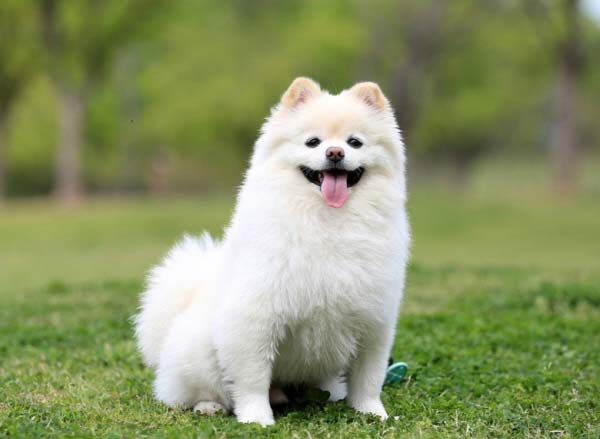

In [25]:
import base64
from io import BytesIO
from PIL import Image
from pymongo import MongoClient
from IPython.display import display

# MongoDB에서 이미지 데이터 가져오기
document = collection.find_one({"filename": "dog.jpg"})
if document:
    img_data = document["data"]
    # base → 바이너리 변환
    img_binary = base64.b64decode(img_data)
    # 메모리에서 바로 이미지 객체 생성
    img = Image.open(BytesIO(img_binary))
    print("MongoDB에서 이미지를 성공적으로 불러왔습니다.")
    display(img)
else:
    print("dog.jpg 문서를 찾을 수 없습니다.")
# 나중에 여러 이미지 데이터들을 처리하고 싶으면 위의 코드에 for문을 적용하면 된다.

client.close()

# Quiz

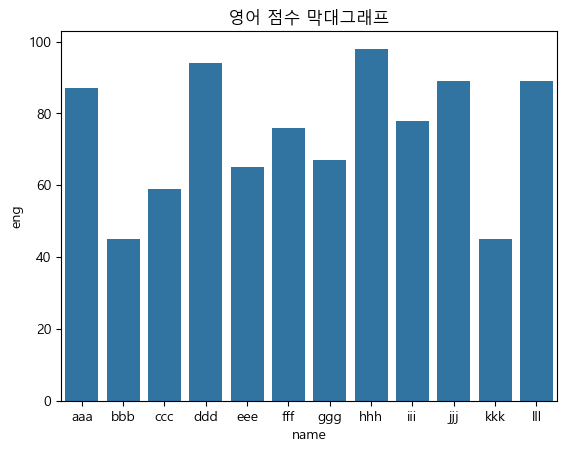

In [49]:
# 빈칸 채우기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from pymongo import MongoClient

# -------------------------------
# 한글 폰트 설정 (Windows)
# -------------------------------
# Windows 기본 폰트: Malgun Gothic
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 음수 값 표시 문제 방지
plt.rcParams['axes.unicode_minus'] = False

# 작성하기
# 1) DB 접속하여 students_csv 컬렉션에 연결하는 코드 작성
client = MongoClient("mongodb://localhost:27017/")
db = client["testdb"]
collection = db["students_csv"]

# 2) MongoDB → DataFrame 변환하는 코드 작성 / NumPy로 데이터 분석할거면 array로 바꿔야 한다
data = pd.DataFrame(list(collection.find({},{"_id": 0})))

# 시각화
sns.barplot(data=data, x="name", y="eng")
plt.title("영어 점수 막대그래프")
plt.show()

  name  age  major
0  홍길동   23  컴퓨터공학
1  박민수   29    영문학
2  김소희   31   전자공학
3  우희진   36    영문학
4  여홍철   28    체육학


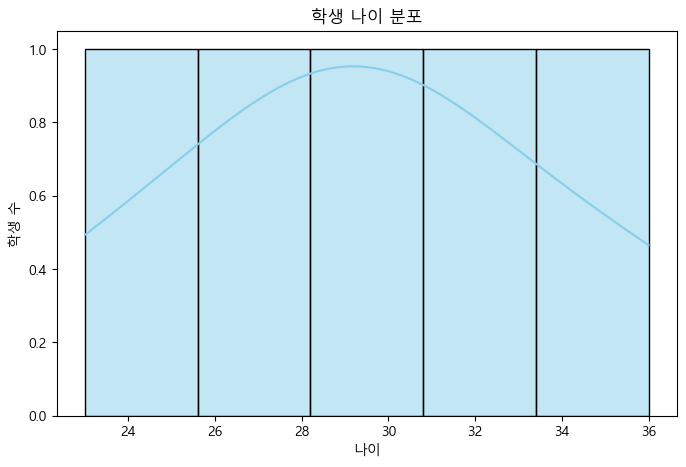

C:\Users\human\AppData\Local\Temp\ipykernel_10272\4116848296.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="major", data=df, palette="pastel")


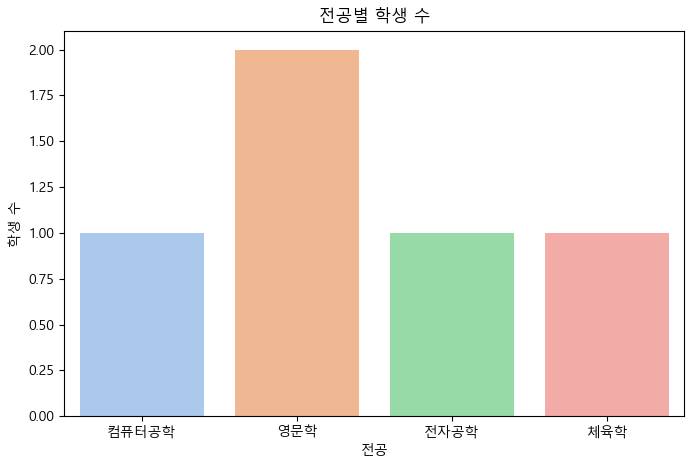

C:\Users\human\AppData\Local\Temp\ipykernel_10272\4116848296.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="major", y="age", data=df, palette="Set2")


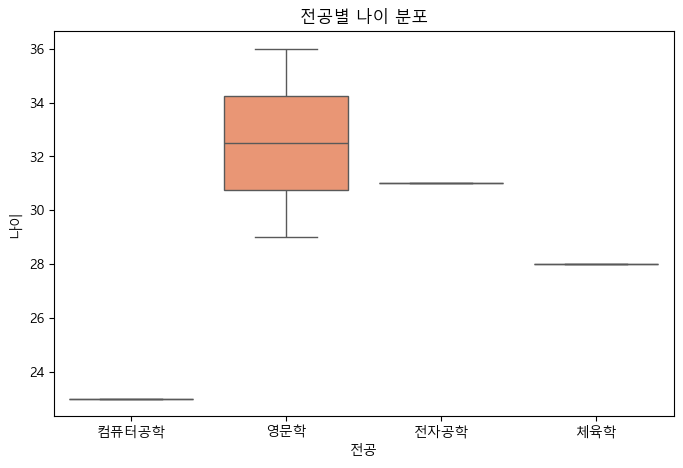

In [51]:
# 퀴즈3

from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# -----------------------------
# 한글 폰트 설정 (Windows)
# -----------------------------
# Windows 기본 폰트: Malgun Gothic
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 음수 값 표시 문제 방지
plt.rcParams['axes.unicode_minus'] = False

# -----------------------------
# MongoDB 연결 및 데이터 불러오기
# -----------------------------
client = MongoClient("mongodb://localhost:27017/")
db = client["testdb"]
collection = db["students"]

cursor = collection.find({})
df = pd.DataFrame(list(cursor))
client.close()

# _id 컬럼 제거
if "_id" in df.columns:
    df = df.drop("_id", axis=1)

print(df)

# -----------------------------
#  나이 분포 히스토그램
# -----------------------------
plt.figure(figsize=(8, 5))
sns.histplot(df["age"], bins=5, kde=True, color="skyblue")
plt.title("학생 나이 분포")
plt.xlabel("나이")
plt.ylabel("학생 수")
plt.show()

# -----------------------------
#  전공별 학생 수 막대그래프
# -----------------------------
plt.figure(figsize=(8, 5))
sns.countplot(x="major", data=df, palette="pastel")
plt.title("전공별 학생 수")
plt.xlabel("전공")
plt.ylabel("학생 수")
plt.show()

# -----------------------------
#  전공별 나이 분포 박스플롯
# -----------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(x="major", y="age", data=df, palette="Set2")
plt.title("전공별 나이 분포")
plt.xlabel("전공")
plt.ylabel("나이")
plt.show()